# 1. Introduction
---
---

## 1.1 Problem Statement

Property investment is one of large sector in Thailand....
Bangkok condo market is comming back after Covid-19, people are looking for affordable condominuim price.

Opportunities:
- Pandemic situation is getting better
- Goverment policy that open for foreigners to invest in Thailand condominiums

Good for:
- My self, finding good condominium with reasonable price
- Investors, to find underpriced condominiums
- Developers, to consider which attributes could lead condominiums to be high value

## 1.2 Data Dictionary

# 2. Functions Preparation
---
---

## 2.1 Libraries Importation

In [29]:
# Import libraries

# General libraries
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Preprocessing and evaluation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn import metrics

# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import xgboost

# Set pandas shown number format
pd.options.display.float_format = '{:.2f}'.format

## 2.2 In-notebook Functions Creation

# 3. Data Preparation
---
---

## 3.1 Data Consolidation

In [453]:
raw_df = pd.DataFrame()

# Set relative path for raw data folder
relative_path = ".\selenium\scrape_data"

# Get file names in folder as a list
folder_names = os.listdir(relative_path)

# Iterate raw csv files in folder
for folder_name in folder_names:
    file_names = os.listdir(f"{relative_path}\\{folder_name}")
    for file_name in file_names:
        try: 
            temp_df = pd.read_csv(f"{relative_path}\\{folder_name}\\{file_name}")
            raw_df = pd.concat([raw_df, temp_df])
        except:
            # Print error file name
            print(file_name)

## 3.2 Data Cleansing

### 3.2.1 Duplication Removal

In [454]:
# Check data shape
# There are _ rows and 21 features from raw datas
raw_df.shape

(32686, 21)

In [455]:
# Check duplicate data
# Dataset contains _ duplicate rows, we can drop it.
raw_df.duplicated().sum()

3595

In [456]:
# Drop duplicate rows and check result
raw_df.drop_duplicates(inplace=True)
raw_df.shape

(29091, 21)

In [457]:
# Drop rows that contain null value in 'amennity_values' column 
# due to old format of website that returned a lot of missing values to our dataframe.
raw_df.dropna(subset = ['amenity_values'], inplace=True)
raw_df.shape

(22915, 21)

In [458]:
# Drop unused columns
raw_df.drop(columns=['address', 'description', 'detail'], inplace=True)

In [459]:
# Reset index after dropping duplicate rows
raw_df = raw_df.reset_index(drop=True)

In [460]:
# Check index head
raw_df.head(2)

,dev,district,sale_price,rent_price,internal_feature_keys,internal_feature_values,external_feature_keys,exteranal_feature_values,amenity_keys,amenity_values,neighbor_cats,neighbor_names,neighbor_distances,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year
0,J Condo Sathorn - Kallaprapruk,Bang Bon,1390000.00,NaN,Bedrooms|Bathrooms|Internal area,1|1|30,Floors|Towers|Year built,25|1|2017,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|False|True|True|True|...,marker marker-expressway|marker marker-bts|mar...,Bang Khun Thian Toll Plaza-Outbound 1|Wutthaka...,6.2 km / 36 minutes by car|6.6 km / 10 minutes...,"57,995",0.00,1.11,5.50,11.30
1,J Condo Sathorn - Kallaprapruk,Bang Bon,1390000.00,NaN,Bedrooms|Internal area,1|28,Floors|Towers|Year built,25|1|2017,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|False|True|True|True|...,marker marker-expressway|marker marker-bts|mar...,Bang Khun Thian Toll Plaza-Outbound 1|Wutthaka...,6.2 km / 36 minutes by car|6.6 km / 10 minutes...,"57,995",0.00,1.11,5.50,11.30


In [461]:
# Check index tail
raw_df.tail(2)

,dev,district,sale_price,rent_price,internal_feature_keys,internal_feature_values,external_feature_keys,exteranal_feature_values,amenity_keys,amenity_values,neighbor_cats,neighbor_names,neighbor_distances,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year
22913,Lumpini Place Narathiwas 24,Yan Nawa,6700000.00,23000.00,Bedrooms|Bathrooms|Internal area,2|2|63,Floors|Towers|Project Area|Year built,"9|2|3,300 m2|2003",Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|False|True|False|Fals...,marker marker-expressway|marker marker-express...,Sathu Pradit 2 Toll Plaza|Sathu Pradit 3 Toll ...,1.1 km / 4 minutes by car|1.1 km / 4 minutes b...,"79,486",0.00,4.55,5.50,-32.22
22914,Fuse Chan - Sathorn,Yan Nawa,3200000.00,NaN,Bedrooms|Bathrooms|Internal area,1|1|34.5,Floors|Towers|Project Area|Year built,"31|3|11,868 m2|2015",Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|False|True|True|False...,marker marker-expressway|marker marker-express...,Chan Toll Plaza|Sathon Toll Plaza|Sathu Pradit...,1 km / 6 minutes by car|1.7 km / 10 minutes by...,"92,308",-2.98,-2.91,5.50,5.75


### 3.2.2 Features Preparation
From scraping process, some features were collected as list of features due to uncertainty of the features occurrence that make .csv unable to store it in one column. 
<br>In-order-that, a list of features were joined by `|` to be a single string.

For example, column `internal_feature_keys` and `internal_feature_values` contain information of `number of bedrooms`, `number of bathrooms`, and `internal area` together as
<br>`bedrooms|bathrooms|internal area`.

**Hence, this section is to split the joined features to be ready for analyzing.**

In [462]:
raw_df.head(2)

,dev,district,sale_price,rent_price,internal_feature_keys,internal_feature_values,external_feature_keys,exteranal_feature_values,amenity_keys,amenity_values,neighbor_cats,neighbor_names,neighbor_distances,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year
0,J Condo Sathorn - Kallaprapruk,Bang Bon,1390000.00,NaN,Bedrooms|Bathrooms|Internal area,1|1|30,Floors|Towers|Year built,25|1|2017,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|False|True|True|True|...,marker marker-expressway|marker marker-bts|mar...,Bang Khun Thian Toll Plaza-Outbound 1|Wutthaka...,6.2 km / 36 minutes by car|6.6 km / 10 minutes...,"57,995",0.00,1.11,5.50,11.30
1,J Condo Sathorn - Kallaprapruk,Bang Bon,1390000.00,NaN,Bedrooms|Internal area,1|28,Floors|Towers|Year built,25|1|2017,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|False|True|True|True|...,marker marker-expressway|marker marker-bts|mar...,Bang Khun Thian Toll Plaza-Outbound 1|Wutthaka...,6.2 km / 36 minutes by car|6.6 km / 10 minutes...,"57,995",0.00,1.11,5.50,11.30


In [463]:
# def split funciton
def split_feature(string):
    try:
        return string.split("|")
    except:
        return None

In [464]:
# List of joined feature column names
joined_features = ['internal_feature_keys', 'internal_feature_values', 'external_feature_keys', 'exteranal_feature_values',
                  'amenity_keys', 'amenity_values', 'neighbor_cats', 'neighbor_names', 'neighbor_distances']

# Iterate column names to create list
for feature in joined_features:
    raw_df[feature] = raw_df[feature].apply(split_feature)

In [465]:
# Check result
raw_df.head(2)

,dev,district,sale_price,rent_price,internal_feature_keys,internal_feature_values,external_feature_keys,exteranal_feature_values,amenity_keys,amenity_values,neighbor_cats,neighbor_names,neighbor_distances,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year
0,J Condo Sathorn - Kallaprapruk,Bang Bon,1390000.00,NaN,"[Bedrooms, Bathrooms, Internal area]","[1, 1, 30]","[Floors, Towers, Year built]","[25, 1, 2017]","[Elevator, Parking, 24-hours Security, CCTV, S...","[True, True, True, True, True, False, True, Tr...","[marker marker-expressway, marker marker-bts, ...","[Bang Khun Thian Toll Plaza-Outbound 1, Wuttha...","[6.2 km / 36 minutes by car, 6.6 km / 10 minut...","57,995",0.00,1.11,5.50,11.30
1,J Condo Sathorn - Kallaprapruk,Bang Bon,1390000.00,NaN,"[Bedrooms, Internal area]","[1, 28]","[Floors, Towers, Year built]","[25, 1, 2017]","[Elevator, Parking, 24-hours Security, CCTV, S...","[True, True, True, True, True, False, True, Tr...","[marker marker-expressway, marker marker-bts, ...","[Bang Khun Thian Toll Plaza-Outbound 1, Wuttha...","[6.2 km / 36 minutes by car, 6.6 km / 10 minut...","57,995",0.00,1.11,5.50,11.30


In [466]:
def restructure_feature(keyword, keys_series, values_series):
    """ Return value in values_list of given keyword that matched keys_list"""
    result_list = []
    for i in range(len(keys_series)):
        try:
            result_list.append(list(values_series)[i][list(keys_series)[i].index(keyword)])
        except:
            result_list.append(None)
    return result_list

In [467]:
# Restructure list to columns
# Internal features
raw_df['bedrooms'] = restructure_feature('Bedrooms', raw_df['internal_feature_keys'], raw_df['internal_feature_values'])
raw_df['bathrooms'] = restructure_feature('Bathrooms', raw_df['internal_feature_keys'], raw_df['internal_feature_values'])
raw_df['internal_area'] = restructure_feature('Internal area', raw_df['internal_feature_keys'], raw_df['internal_feature_values'])

In [468]:
# Restructure list to columns
# External features
raw_df['floors'] = restructure_feature('Floors', raw_df['external_feature_keys'], raw_df['exteranal_feature_values'])
raw_df['towers'] = restructure_feature('Towers', raw_df['external_feature_keys'], raw_df['exteranal_feature_values'])
raw_df['project_area'] = restructure_feature('Project Area', raw_df['external_feature_keys'], raw_df['exteranal_feature_values'])
raw_df['year_built'] = restructure_feature('Year built', raw_df['external_feature_keys'], raw_df['exteranal_feature_values'])

In [469]:
# Restructure list to columns
# Amenities
raw_df['has_elevator'] = restructure_feature('Elevator', raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_parking'] = restructure_feature('Parking', raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_security'] = restructure_feature('24-hours Security', raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_cctv'] = restructure_feature('CCTV', raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_pool'] = restructure_feature('Swimming Pool', raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_sauna'] = restructure_feature('Sauna', raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_gym'] = restructure_feature('Gym', raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_garden_bbq'] = restructure_feature('Garden / BBQ', raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_playground'] = restructure_feature("Playground / Kid's Area", raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_shop_on_premise'] = restructure_feature('Shop on Premise', raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_restaurant_on_premise'] = restructure_feature('Restaurant on Premise', raw_df['amenity_keys'], raw_df['amenity_values'])
raw_df['has_wifi'] = restructure_feature('Wi-Fi', raw_df['amenity_keys'], raw_df['amenity_values'])

In [470]:
# Restructure list to columns
# neighborhood
raw_df[['neighbor_cats', 'neighbor_names', 'neighbor_distances']]

,neighbor_cats,neighbor_names,neighbor_distances
0,"[marker marker-expressway, marker marker-bts, ...","[Bang Khun Thian Toll Plaza-Outbound 1, Wuttha...","[6.2 km / 36 minutes by car, 6.6 km / 10 minut..."
1,"[marker marker-expressway, marker marker-bts, ...","[Bang Khun Thian Toll Plaza-Outbound 1, Wuttha...","[6.2 km / 36 minutes by car, 6.6 km / 10 minut..."
2,"[marker marker-expressway, marker marker-bts, ...","[Bang Khun Thian Toll Plaza-Outbound 1, Wuttha...","[6.2 km / 36 minutes by car, 6.6 km / 10 minut..."
3,"[marker marker-expressway, marker marker-bts, ...","[Bang Khun Thian Toll Plaza-Outbound 1, Wuttha...","[6.2 km / 36 minutes by car, 6.6 km / 10 minut..."
4,"[marker marker-expressway, marker marker-bts, ...","[Bang Khun Thian Toll Plaza-Outbound 1, Wuttha...","[6.2 km / 36 minutes by car, 6.6 km / 10 minut..."
...,...,...,...
22910,"[marker marker-expressway, marker marker-expre...","[Rama 4-2 Toll Plaza, Rama 4-1 Toll Plaza, Khl...","[1.1 km / 5 minutes by car, 1.1 km / 4 minutes..."
22911,"[marker marker-expressway, marker marker-expre...","[Rama 3 Toll Plaza, Sathu Pradit 2 Toll Plaza,...","[680 m / 8 minutes by foot, 1.8 km / 4 minutes..."
22912,"[marker marker-expressway, marker marker-expre...","[River Side Toll Plaza, Rama 4-2 Toll Plaza, R...","[450 m / 5 minutes by foot, 2 km / 9 minutes b..."
22913,"[marker marker-expressway, marker marker-expre...","[Sathu Pradit 2 Toll Plaza, Sathu Pradit 3 Tol...","[1.1 km / 4 minutes by car, 1.1 km / 4 minutes..."


**Neighborhood features have to be done more additional steps to split list to be columns.** 
<br>These features are about the top 6 nerest transportation facilities, which including city train(BTS and MRT), express way.
These features were captured by iteration of algorithm that made a length of list for each row 

Challenges:
1. Differece in number of value in list: 0 to 6
2. Differece in order of value in categorical list
3. Difference in type of facility
4. Difference in unit of measurement: meters, kilometers

**To simplify these features' situation, features will be cosidered as two types:**
1. Nearest distance between condominium and tranportation facilities
    - City train
    - Express way
2. Boolean features wheater condominium is closer than 1 km. to transportation facilities
    - City train
    - Express way

In [471]:
# define function that returns closet distance to transportation facilities

def distance_str_to_float(string):
    """Covert string distance to float and covert to meter"""
    if len(string) > 0:
        trim_str = string.split('/')[0].strip()
        if trim_str[-2:] == 'km':
            return float(trim_str[:-3]) * 1000
        elif trim_str[-1] == 'm':
            return float(trim_str[:-2])
    else:
        return None

def get_distance_citytrain(category_list, distance_list):
    """Fuction use with dataframe .apply or .map
    Return: distance of closest city train in meter unit"""
    if (category_list != None):
        if ('marker marker-bts' in category_list) or ('marker marker-mrt' in category_list):
            convert_distance_list = []
            # Iterate all value in list to find city train distances
            for i in range(len(category_list)):
                if category_list[i] in ['marker marker-bts', 'marker marker-mrt']:
                    # Convert string to distance
                    convert_distance = distance_str_to_float(distance_list[i])
                    # Append all bts/mrt distances
                    if convert_distance != None:
                        convert_distance_list.append(convert_distance)
            # return closest distance
            convert_distance_list.sort()
            try:
                return convert_distance_list[0]
            except:
                return None
    return None

def get_distance_expressway(category_list, distance_list):
    """Fuction use with dataframe .apply or .map
    Return: distance of closest express way in meter unit"""
    if (category_list != None):
        if ('marker marker-expressway' in category_list):
            convert_distance_list = []
            # Iterate all value in list to find city train distances
            for i in range(len(category_list)):
                if category_list[i] in ['marker marker-expressway']:
                    # Convert string to distance
                    convert_distance = distance_str_to_float(distance_list[i])
                    # Append all bts/mrt distances
                    if convert_distance != None:
                        convert_distance_list.append(convert_distance)
            # return closest distance
            convert_distance_list.sort()
            try:
                return convert_distance_list[0]
            except:
                return None
    return None

In [472]:
# Create transport facility distance columns
raw_df['city_train_distance'] = raw_df[['neighbor_cats', 'neighbor_distances']].apply(lambda x: get_distance_citytrain(x[0], x[1]), axis=1)
raw_df['express_way_distance'] = raw_df[['neighbor_cats', 'neighbor_distances']].apply(lambda x: get_distance_expressway(x[0], x[1]), axis=1)

# Create boolean columns if distance <= 1 km.
raw_df['close_city_train'] = raw_df['city_train_distance'].apply(lambda x: int(x <= 1000) if x != None else 0)
raw_df['close_express_way'] = raw_df['express_way_distance'].apply(lambda x: int(x <= 1000) if x != None else 0)

In [473]:
# Drop unused columns
raw_df.drop(columns=joined_features, inplace=True)

In [474]:
raw_df.head()

,dev,district,sale_price,rent_price,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year,bedrooms,...,has_gym,has_garden_bbq,has_playground,has_shop_on_premise,has_restaurant_on_premise,has_wifi,city_train_distance,express_way_distance,close_city_train,close_express_way
0,J Condo Sathorn - Kallaprapruk,Bang Bon,1390000.00,NaN,"57,995",0.00,1.11,5.50,11.30,1,...,True,True,True,False,False,False,6600.00,6200.00,0,0
1,J Condo Sathorn - Kallaprapruk,Bang Bon,1390000.00,NaN,"57,995",0.00,1.11,5.50,11.30,1,...,True,True,True,False,False,False,6600.00,6200.00,0,0
2,J Condo Sathorn - Kallaprapruk,Bang Bon,1390000.00,NaN,"57,995",0.00,1.11,5.50,11.30,1,...,True,True,True,False,False,False,6600.00,6200.00,0,0
3,J Condo Sathorn - Kallaprapruk,Bang Bon,1790000.00,NaN,"57,995",0.00,1.11,5.50,11.30,1,...,True,True,True,False,False,False,6600.00,6200.00,0,0
4,J Condo Sathorn - Kallaprapruk,Bang Bon,1290000.00,NaN,"57,995",0.00,1.11,5.50,11.30,1,...,True,True,True,False,False,False,6600.00,6200.00,0,0


### 3.2.3 Missing Values and Data Types Check

In [475]:
def missing_values_df(df):
    """Return dataframe of missing values and its percentage comparing with total length of dataframe"""
    missing_df = pd.DataFrame({'n_missing': df.isnull().sum().sort_values(ascending=False)})
    missing_df['pct_missing'] = round(missing_df['n_missing'] / len(df) * 100, 2)
    return missing_df[missing_df['n_missing'] > 0]

In [476]:
# Check missing values
missing_values_df(raw_df)

,n_missing,pct_missing
rent_price,19820,86.49
project_area,10359,45.21
bathrooms,2496,10.89
year_built,2077,9.06
has_restaurant_on_premise,1805,7.88
has_playground,1558,6.80
has_shop_on_premise,1248,5.45
has_wifi,1128,4.92
has_sauna,1124,4.91
bedrooms,847,3.70


**According to missing value table, missing values can be separated to 4 groups by number of missing and approach to fix them.**
1. **High percentage of missig data:**
    - Approch: Drop whole columns
    - `rent_price` : 86.46% missing
    - `project_area` : 42.49% missing
2. **Boolean columns (all amenity features):**
    - Approch: Treat missing data as 0 since absences of objects that unable to scrape could imply that condominiums do not have these fuctions.
3. **Columns that missing percentage less than or equal to 15%:**
    - `year_built` which has 15% of missing also considered
    - 2 approaches could be applied:
        - Drop missing rows
        - Impute median values
4.**Columns that do not need to fix:** Sice they are additional detail of codominiums.
    - `dev`
    - `address`
    - `detail`
    - `description`

In [477]:
# 1. Drop columns
raw_df.drop(columns=['rent_price', 'project_area'], inplace=True)

In [478]:
# 2. Fill null with zero for boolean features
amenity_columns = raw_df.columns[raw_df.columns.str.contains('has')]
raw_df[amenity_columns] = raw_df[amenity_columns].fillna(value=0)

In [479]:
# 3. Columns that missing percentage less than or equal to 15%

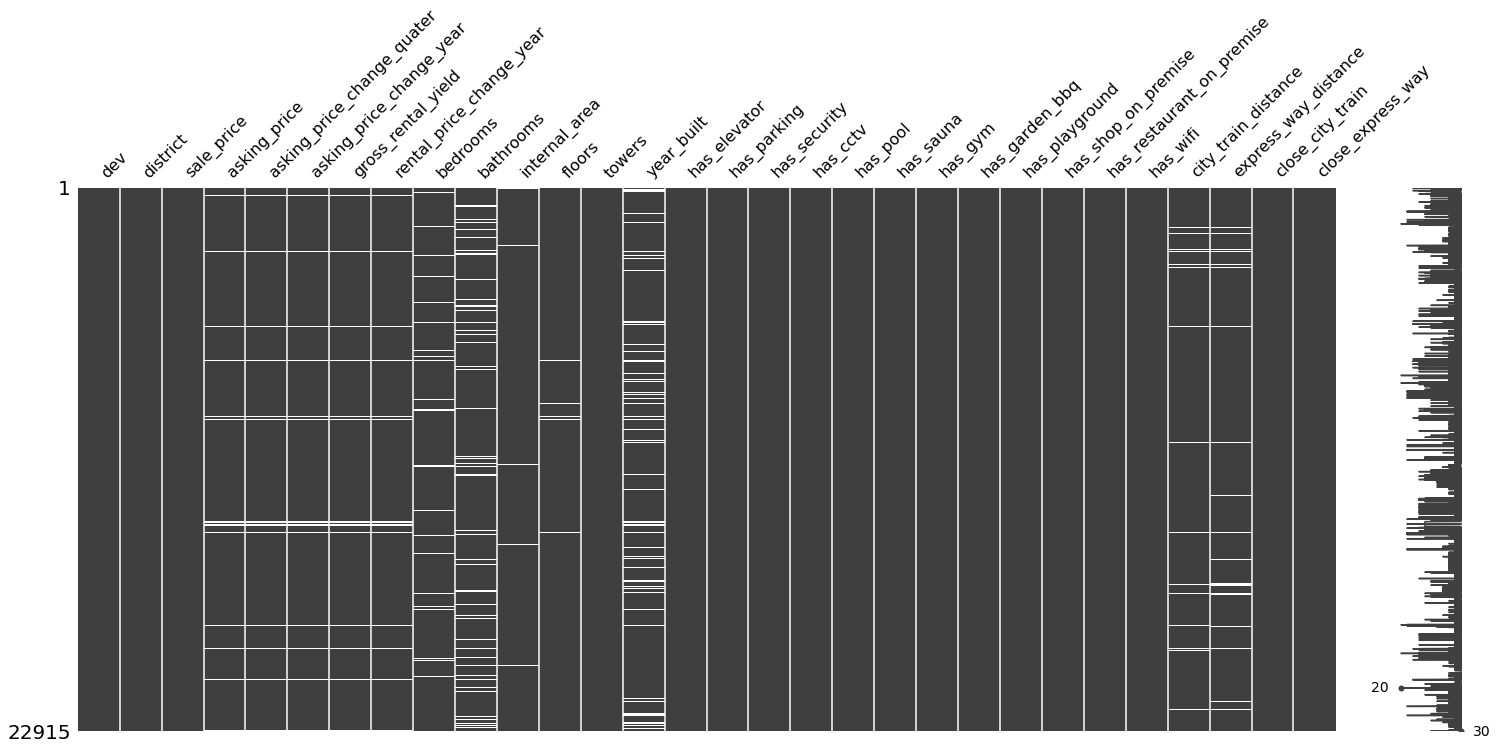

In [480]:
# Check missing values by missingno library to see patern and effect on missing data
msno.matrix(raw_df);

**From missingno matrix**, data are likely to be missing on the same rows, which could imply that if we drop row that contain null, 
<br>data will be missing about 15% based on maxmimum percentage of missing values. 
<br>It also can implay that if we drop rows that missing one feature, the rest of features will be droped the same rows that have missing value.

In [481]:
# Check if we drop rows that contain missing value
len_df = raw_df.shape[0]
len_drop_df = raw_df.drop(columns=['dev']).dropna().shape[0]
print(f"Original data: {len_df}")
print(f"Data after dropping null: {len_drop_df}")
print(f"Row loss: {len_df - len_drop_df}")
print(f"%Loss: {round((len_df - len_drop_df) / len_df * 100, 2)}")

Original data: 22915
Data after dropping null: 17243
Row loss: 5672
%Loss: 24.75


**If we drop null values**, data will be decreased 181 rows, which are 17.89% of original rows, and will be 831 rows totally.
<br>831 data are still accepctable for regression problem but we can also try to impute data.
<br> We will pause fixing missing values for a moment and cotinue again when we're doing model after train test spliting to avoid data leakage.


In [482]:
# Check missing values
missing_values_df(raw_df)

,n_missing,pct_missing
bathrooms,2496,10.89
year_built,2077,9.06
bedrooms,847,3.70
asking_price,592,2.58
asking_price_change_quater,592,2.58
asking_price_change_year,592,2.58
gross_rental_yield,592,2.58
rental_price_change_year,592,2.58
express_way_distance,559,2.44
city_train_distance,409,1.78


### 3.2.4 Data Type Check
Data were scraped as text without any transforming before saving to .csv, therefore we need to turn numeric features to be appropriate form.

In [483]:
raw_df.dtypes

dev                            object
district                       object
sale_price                    float64
asking_price                   object
asking_price_change_quater    float64
asking_price_change_year       object
gross_rental_yield            float64
rental_price_change_year       object
bedrooms                       object
bathrooms                      object
internal_area                  object
floors                         object
towers                         object
year_built                     object
has_elevator                   object
has_parking                    object
has_security                   object
has_cctv                       object
has_pool                       object
has_sauna                      object
has_gym                        object
has_garden_bbq                 object
has_playground                 object
has_shop_on_premise            object
has_restaurant_on_premise      object
has_wifi                       object
city_train_d

#### 3.2.4.1 Type Casting

##### **`asking_price`**
---

In [484]:
# Cast 'asking_price' to be float
# 'asking_price' has ',' in each value, we need to remove it before casting
raw_df['asking_price']

0         57,995
1         57,995
2         57,995
3         57,995
4         57,995
          ...   
22910    142,521
22911    126,211
22912    164,122
22913     79,486
22914     92,308
Name: asking_price, Length: 22915, dtype: object

In [485]:
# 'asking_price'
# Remove ','
raw_df['asking_price'] = raw_df['asking_price'].str.replace(',', '')

# Cast to float
raw_df['asking_price'] = raw_df['asking_price'].astype(float)

##### **`asking_price_change_year`**
---

In [486]:
# Cast 'asking_price_change_year' to be float
# 'asking_price_change_year' has '–' that represent of null value, we need to remove it.
raw_df['asking_price_change_year'][raw_df['asking_price_change_year'] == '–'][:5]

4299    –
4350    –
4351    –
4361    –
4368    –
Name: asking_price_change_year, dtype: object

In [487]:
# 'asking_price_change_year'
# Remove '–'
raw_df['asking_price_change_year'] = raw_df['asking_price_change_year'].replace('–', None)

# Cast to float
raw_df['asking_price_change_year'] = raw_df['asking_price_change_year'].astype(float)

##### **`rental_price_change_year`**
---

In [488]:
# Cast 'rental_price_change_year' to be float
# 'rental_price_change_year' has '–' that represent of null value, we need to remove it.
raw_df['rental_price_change_year'][raw_df['rental_price_change_year'] == '–'][:5]

28     –
114    –
135    –
136    –
137    –
Name: rental_price_change_year, dtype: object

In [489]:
# 'rental_price_change_year'
# Remove '–'
raw_df['rental_price_change_year'] = raw_df['rental_price_change_year'].replace('–', None)

# Cast to float
raw_df['rental_price_change_year'] = raw_df['rental_price_change_year'].astype(float)

##### **`internal_area`**
---
Problem: After trying to cast `internal_area` as float, an error raised up that ',' was found in the feature.
<br>So, we need to explore more about the feature whether it was a mistake by scaping process or a mistake from the website itself.

In [490]:
# Find values of 'internal_area' that contain ','
raw_df[['dev', 'sale_price', 'internal_area']][raw_df['internal_area'].str.find(',') > 0]

,dev,sale_price,internal_area
1987,Four Seasons Private Residences,475000000.00,"1,050"
2214,Four Seasons Private Residences,453933000.00,"1,008"
3376,The Tree RIO,6190000.00,"6,190,000"
3781,Commonwealth Pinklao,56990000.00,"1,268.2"
3819,Bangkok River Marina,200000000.00,"1,000"
8195,Emerald Residence Ratchada,2750000.00,"10,000"
8409,Belle Grand Rama 9,11700535.00,"36,049"
9061,Condolette Midst Rama 9,4797000.00,"2,940"
10445,Siamese Exclusive Queens,13401574.00,"44,814"
11310,The ESSE Sukhumvit 36,20302257.00,"61,588"


**From the result above**, 6 rows incorrectly returned `internal_area`, which should be returned in square meter unit of room size.

**The possible reasons are:**
1. Incorrectly scraping problem
2. Incorrect input from the website

**Conclusion:** After revisiting the website, it was found that these 6 observations were reported as overall internal area but unable to find the correct internal area of each room because of varity numbers of internal infrastructures. Therefore, **they will be replaced as null and be imputed in the future process.**

In [491]:
# Get incorrect values' indexes
selective_index = raw_df[['dev', 'sale_price', 'internal_area']][raw_df['internal_area'].str.find(',') > 0].index

# Replace 'internal_area' by None
raw_df.loc[selective_index, 'internal_area'] = None

# Check result
raw_df.loc[selective_index, ['dev', 'sale_price', 'internal_area']]

,dev,sale_price,internal_area
1987,Four Seasons Private Residences,475000000.00,None
2214,Four Seasons Private Residences,453933000.00,None
3376,The Tree RIO,6190000.00,None
3781,Commonwealth Pinklao,56990000.00,None
3819,Bangkok River Marina,200000000.00,None
8195,Emerald Residence Ratchada,2750000.00,None
8409,Belle Grand Rama 9,11700535.00,None
9061,Condolette Midst Rama 9,4797000.00,None
10445,Siamese Exclusive Queens,13401574.00,None
11310,The ESSE Sukhumvit 36,20302257.00,None


In [492]:
# Now we can cast it as float
raw_df['internal_area'] = raw_df['internal_area'].astype(float)

##### **`bedrooms`**
---
`bedrooms` feature has one obstacle that make this feature unable to be casted as float, which is 'Studio' so we can replace it as 0 due to it as one room with all functions.

We also see some obviouse values in this feature, which bedrooms that too large number, so we need to explore it further.

In [493]:
raw_df['bedrooms'].unique()

array(['1', None, '3', '2', '5', '4', '11', 'Studio', '8', '6', '7', '9',
       '27'], dtype=object)

In [494]:
# Replace 'Studio' with zero
raw_df['bedrooms'] = raw_df['bedrooms'].replace('Studio', '0')

# Cast as float
raw_df['bedrooms'] = raw_df['bedrooms'].astype(float)

In [500]:
raw_df[raw_df['bedrooms'] >= 5][['dev', 'sale_price', 'bedrooms']].sort_values(by='sale_price')[:10]

,dev,sale_price,bedrooms
11895,D Condo Onnut - Suvarnabhumi,1300000.00,11.00
8357,JW CONDO @DONMUANG,1690000.00,9.00
482,Bangkok Horizon Ramkhamhaeng,2200000.00,11.00
9167,Chrisma Condo Ramintra,4500000.00,27.00
19563,Flora Ville,5900000.00,5.00
7382,Ekachai Condominium 2,6050000.00,7.00
19737,Royal Castle Pattanakarn,12000000.00,6.00
16089,Baan On Nut Sukhumvit 77,14000000.00,7.00
2924,NS Tower Central City Bangna,16500000.00,5.00
19915,Royal Castle Pattanakarn,18000000.00,5.00


In [501]:
raw_df[raw_df['bedrooms'] >= 5][['dev', 'sale_price', 'bedrooms']].sort_values(by='sale_price')[:10].index

Int64Index([11895, 8357, 482, 9167, 19563, 7382, 19737, 16089, 2924, 19915], dtype='int64')

In [505]:
# Change to 1 beds
# 11895, 482
raw_df.loc[[11895, 482], 'bedrooms'] = 1

In [506]:
# Change to 0 beds
# 8357
raw_df.loc[8357, 'bedrooms'] = 0

In [507]:
# Change to 2 beds
# 9167
raw_df.loc[9167, 'bedrooms'] = 2

In [508]:
# Drop rows
# 7382
raw_df = raw_df.drop(7382)

In [509]:
# Check result
raw_df[raw_df['bedrooms'] >= 5][['dev', 'sale_price', 'bedrooms']].sort_values(by='sale_price')[:10]

,dev,sale_price,bedrooms
19563,Flora Ville,5900000.00,5.00
19737,Royal Castle Pattanakarn,12000000.00,6.00
16089,Baan On Nut Sukhumvit 77,14000000.00,7.00
2924,NS Tower Central City Bangna,16500000.00,5.00
19915,Royal Castle Pattanakarn,18000000.00,5.00
18416,Bangkok Boulevard Ramintra-Watcharapol,19900000.00,5.00
8987,Supalai Wellington,25000000.00,5.00
8457,Supalai Wellington,25500000.00,5.00
16914,Tree Condo LUXE Sukhumvit 52,30000000.00,5.00
8443,Belle Grand Rama 9,33000000.00,5.00


As per above table, there are 3 rooms that number of bedrooms and sale prices are not reasonable. After we exploring sources of data, It was found that there are typo mistakes from salers, thus we will fix it.

##### **`bathrooms`, `floors`, `towers`, `year_built`**
---
These features can be casted directly without any error occurrence.

In [510]:
for feat in ['bathrooms', 'floors', 'towers', 'year_built']:
    raw_df[feat] = raw_df[feat].astype(float)

In [511]:
raw_df.dtypes

dev                            object
district                       object
sale_price                    float64
asking_price                  float64
asking_price_change_quater    float64
asking_price_change_year      float64
gross_rental_yield            float64
rental_price_change_year      float64
bedrooms                      float64
bathrooms                     float64
internal_area                 float64
floors                        float64
towers                        float64
year_built                    float64
has_elevator                   object
has_parking                    object
has_security                   object
has_cctv                       object
has_pool                       object
has_sauna                      object
has_gym                        object
has_garden_bbq                 object
has_playground                 object
has_shop_on_premise            object
has_restaurant_on_premise      object
has_wifi                       object
city_train_d

##### **`Boolean features`**
---
All boolean featurs, now are string, need to be interger.

In [512]:
raw_df.columns[raw_df.columns.str.contains('has')]

Index(['has_elevator', 'has_parking', 'has_security', 'has_cctv', 'has_pool',
       'has_sauna', 'has_gym', 'has_garden_bbq', 'has_playground',
       'has_shop_on_premise', 'has_restaurant_on_premise', 'has_wifi'],
      dtype='object')

In [513]:
# List columns that need to be interger
boolean_features = raw_df.columns[raw_df.columns.str.contains('has')]

# Check if features are unable to be casted
for feat in boolean_features:
    try:
        raw_df[feat].astype(int)
    except:
        print('Unable to cast:', feat)

Unable to cast: has_elevator
Unable to cast: has_parking
Unable to cast: has_security
Unable to cast: has_cctv
Unable to cast: has_pool
Unable to cast: has_sauna
Unable to cast: has_gym
Unable to cast: has_garden_bbq
Unable to cast: has_playground
Unable to cast: has_shop_on_premise
Unable to cast: has_restaurant_on_premise
Unable to cast: has_wifi


**After tring to cast boolean features as int, errors were raised.** 

In [514]:
# Check values inside boolean feature
raw_df['has_pool'].unique()

array(['True', 'False', 0], dtype=object)

It was found out that values 'True' and 'False' as string were not treated as `Boolean`. To cast these features, we need to use condition to check context for these string.

In [515]:
for feat in boolean_features:
    raw_df[feat] = raw_df[feat].apply(lambda x: 1 if x == 'True' else 0)

##### **`Final feature data types`**
---

In [516]:
# Check final data types
raw_df.dtypes

dev                            object
district                       object
sale_price                    float64
asking_price                  float64
asking_price_change_quater    float64
asking_price_change_year      float64
gross_rental_yield            float64
rental_price_change_year      float64
bedrooms                      float64
bathrooms                     float64
internal_area                 float64
floors                        float64
towers                        float64
year_built                    float64
has_elevator                    int64
has_parking                     int64
has_security                    int64
has_cctv                        int64
has_pool                        int64
has_sauna                       int64
has_gym                         int64
has_garden_bbq                  int64
has_playground                  int64
has_shop_on_premise             int64
has_restaurant_on_premise       int64
has_wifi                        int64
city_train_d

#### 3.2.4.2 Missing Values Re-check
After fixing all data types, number of missing values will be increased from some strings removal process.
<br>**Let's re-check missing values again.**

In [517]:
# Check missing values
missing_df = pd.DataFrame({'n_missing': raw_df.isnull().sum().sort_values(ascending=False)})
missing_df['pct_missing'] = round(missing_df['n_missing'] / len(raw_df) * 100, 2)
missing_df[missing_df['n_missing'] > 0]

,n_missing,pct_missing
bathrooms,2496,10.89
year_built,2077,9.06
rental_price_change_year,1638,7.15
bedrooms,847,3.70
asking_price_change_year,609,2.66
asking_price,591,2.58
asking_price_change_quater,591,2.58
gross_rental_yield,591,2.58
express_way_distance,559,2.44
city_train_distance,409,1.78


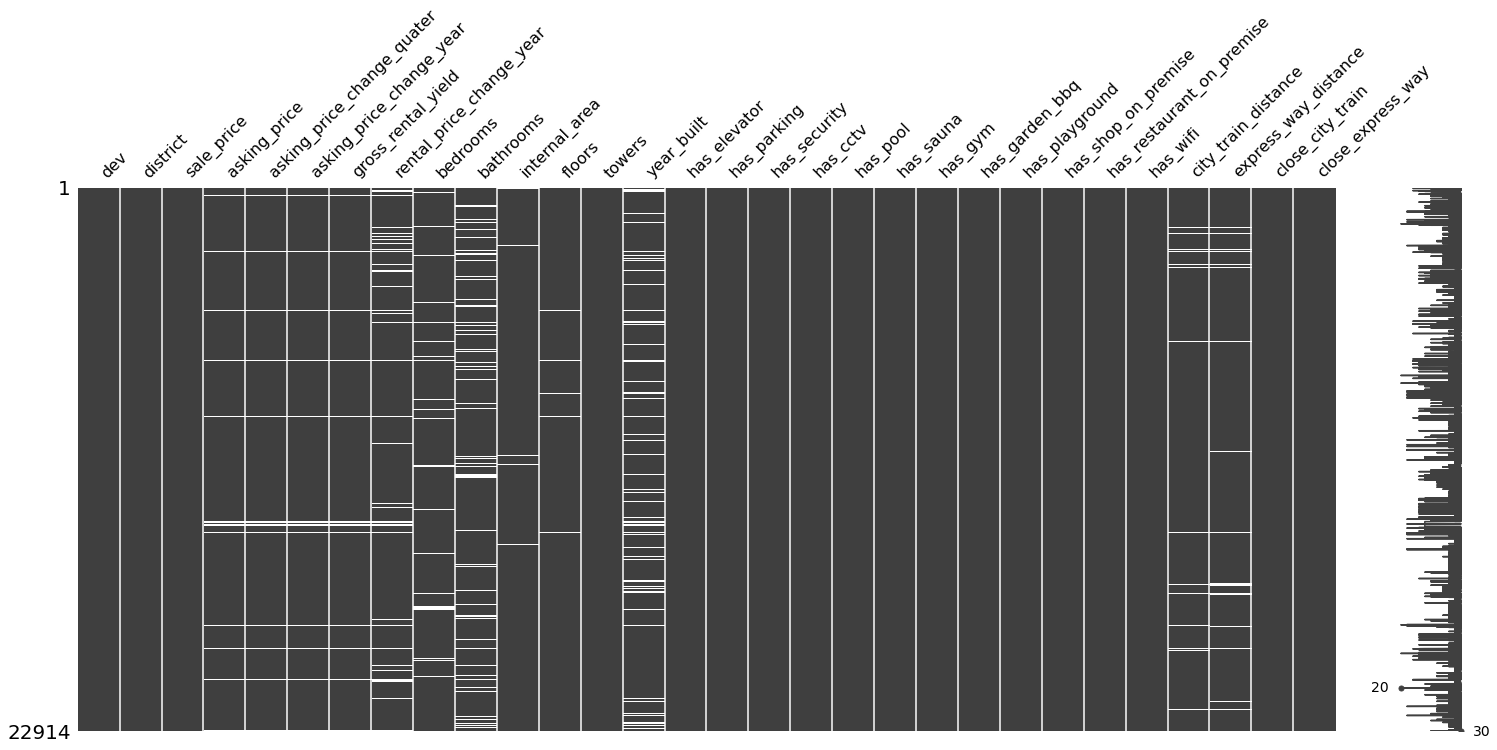

In [518]:
# Check missing values by missingno library to see patern and effect on missing data
msno.matrix(raw_df);

In [519]:
# Check if we drop rows that contain missing value
len_df = raw_df.shape[0]
len_drop_df = raw_df.drop(columns=['dev']).dropna().shape[0]
print(f"Original data: {len_df}")
print(f"Data after dropping null: {len_drop_df}")
print(f"Row loss: {len_df - len_drop_df}")
print(f"%Loss: {round((len_df - len_drop_df) / len_df * 100, 2)}")

## Original result
# Original data: 1012
# Data after dropping null: 831
# Row loss: 181
# %Loss: 17.89

Original data: 22914
Data after dropping null: 16604
Row loss: 6310
%Loss: 27.54


**As per result,** if we drop rows that contain null value, data loss increase from 181 rows to 195 rows, which is equivalent to 19.27% loss.
<br> 817 remaining observations are still reasonable to solve a regression problem.

**Now we decided to leave a missing values handeling for a moment and move through EDA section to understand data behavior before going to impute or remove it.**

In [521]:
# Save clean dataframe as csv to re-use it
raw_df.to_csv('./data/condominium_price_all_clean_final.csv', index=False)

# 4. EDA
---
---

In [533]:
# Read saved csv file
df = pd.read_csv('./data/condominium_price_all_clean_final.csv')

In [535]:
# Set numeric features' column names
numeric_features = [
    'asking_price', 'asking_price_change_quater', 'asking_price_change_year',
    'gross_rental_yield', 'rental_price_change_year', 'bedrooms',
    'bathrooms', 'internal_area', 'floors', 'towers', 'year_built',
    'city_train_distance', 'express_way_distance']

categorical_features = [
    'bedrooms', 'bathrooms',
    'has_elevator', 'has_parking', 'has_security', 'has_cctv', 'has_pool',
    'has_sauna', 'has_gym', 'has_garden_bbq', 'has_playground',
    'has_shop_on_premise', 'has_restaurant_on_premise', 'has_wifi',
    'close_city_train', 'close_express_way']

In [536]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sale_price,22914.00,10392374.34,22887064.60,300000.00,2500000.00,4500000.00,9400000.00,580000000.00
asking_price,22323.00,133422.99,91072.66,11212.00,74066.00,105879.00,161842.00,780470.00
asking_price_change_quater,22323.00,0.80,26.50,-57.21,0.00,0.00,0.00,664.00
asking_price_change_year,22305.00,2.00,15.49,-81.16,-4.70,0.87,8.78,218.00
gross_rental_yield,22323.00,4.43,1.49,0.00,3.91,4.46,5.13,27.51
rental_price_change_year,21276.00,1.04,14.87,-94.46,-5.74,1.10,7.75,130.24
bedrooms,22067.00,1.43,0.69,0.00,1.00,1.00,2.00,8.00
bathrooms,20418.00,1.42,0.81,1.00,1.00,1.00,2.00,24.00
internal_area,22643.00,61.94,63.47,1.00,30.00,39.00,65.43,929.00
floors,22592.00,26.47,16.75,2.00,8.00,26.00,37.00,77.00


## 4.1 Sale Price Outlier Check

In [537]:

df['sale_price'].agg(['count', 'max', 'min', 'mean', 'median'])

count        22914.00
max      580000000.00
min         300000.00
mean      10392374.34
median     4500000.00
Name: sale_price, dtype: float64

Skewness: 10.403399585502914


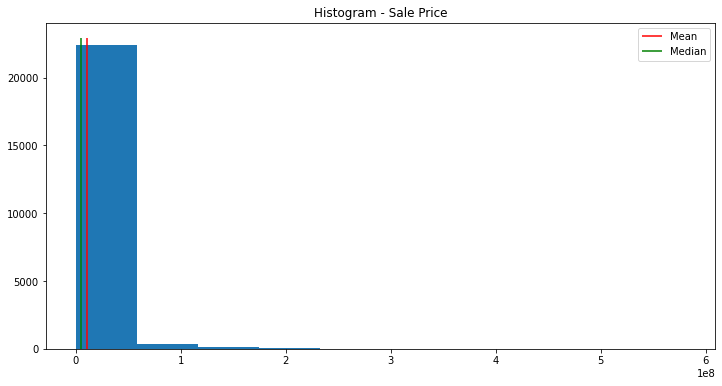

In [538]:
# Plot sale_price distribution.

print('Skewness:', df['sale_price'].skew())

plt.figure(figsize=(12, 6))
plt.hist(df['sale_price'])
plt.vlines(df['sale_price'].mean(), ymin=0, ymax=df.shape[0], color='red', label='Mean')
plt.vlines(df['sale_price'].median(), ymin=0, ymax=df.shape[0], color='Green', label='Median')
plt.title('Histogram - Sale Price')
plt.legend();


## The saleprice distribution is right skew so we could normalize it by using log e

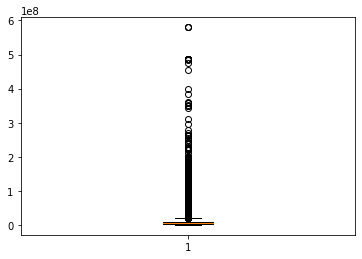

In [539]:
# Boxplot
plt.boxplot(df['sale_price']);

**Due to various characters of condominium and differences demand in each district,** condominium sale price range is extremely wide that made sale price variable has outlier values on the right hand side.

The effect of extremely wide sale price range could affect liner regression model more than other types of model.

**To minimize the effect on liner regression model we can:**
1. Remove some extreme outliers out from our dataset
2. Log transform sale price variable to normalize its scale

Skewness: 0.8232295008680824


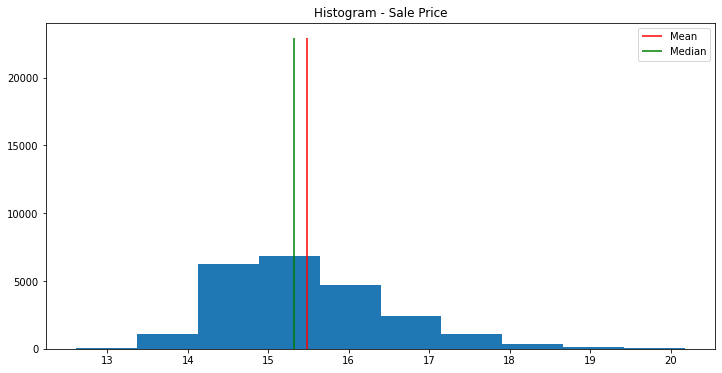

In [540]:
# Plot sale_price distribution.

print('Skewness:', np.log(df['sale_price']).skew())

plt.figure(figsize=(12, 6))
plt.hist(np.log(df['sale_price']))
plt.vlines(np.log(df['sale_price']).mean(), ymin=0, ymax=df.shape[0], color='red', label='Mean')
plt.vlines(np.log(df['sale_price']).median(), ymin=0, ymax=df.shape[0], color='Green', label='Median')
plt.title('Histogram - Sale Price')
plt.legend();


## The saleprice distribution is right skew so we could normalize it by using log e

**After `sale_price` log transformation,** its distribution looks more normal. comparing before and after transformation, skewness has reduced and histogram chart is also more normally distributed.

## 4.3 Correlation

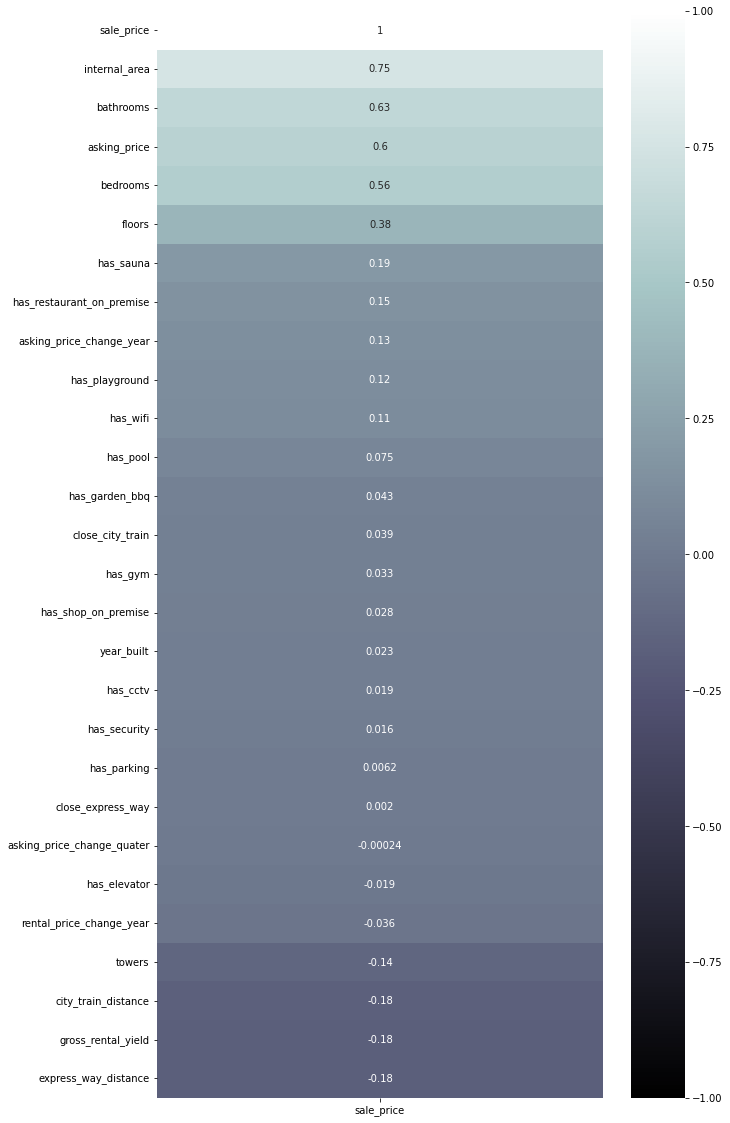

In [541]:
# Find correlation to sale_price
# Check correlation with saleprice
plt.figure(figsize=(10,20))
sns.heatmap(df.corr()[['sale_price']].sort_values(by='sale_price', ascending=False)
            , cmap='bone', annot=True, vmin=-1, vmax=1);

## 4.4 Data Characteristic

### 4.4.1 Numeric Features

In [542]:
# Print each numeric features aggregate values

for feat in numeric_features:
    print(f"""
-------------- {feat} --------------""")
    print(df[feat].agg(['count', 'max', 'min', 'mean', 'median']))
    print("-------------------------------------")
    


-------------- asking_price --------------
count     22323.00
max      780470.00
min       11212.00
mean     133422.99
median   105879.00
Name: asking_price, dtype: float64
-------------------------------------

-------------- asking_price_change_quater --------------
count    22323.00
max        664.00
min        -57.21
mean         0.80
median       0.00
Name: asking_price_change_quater, dtype: float64
-------------------------------------

-------------- asking_price_change_year --------------
count    22305.00
max        218.00
min        -81.16
mean         2.00
median       0.87
Name: asking_price_change_year, dtype: float64
-------------------------------------

-------------- gross_rental_yield --------------
count    22323.00
max         27.51
min          0.00
mean         4.43
median       4.46
Name: gross_rental_yield, dtype: float64
-------------------------------------

-------------- rental_price_change_year --------------
count    21276.00
max        130.24
min        

To understand more about relationship of `sale_price` and numeric features, we will plot `sale_price` against each features.

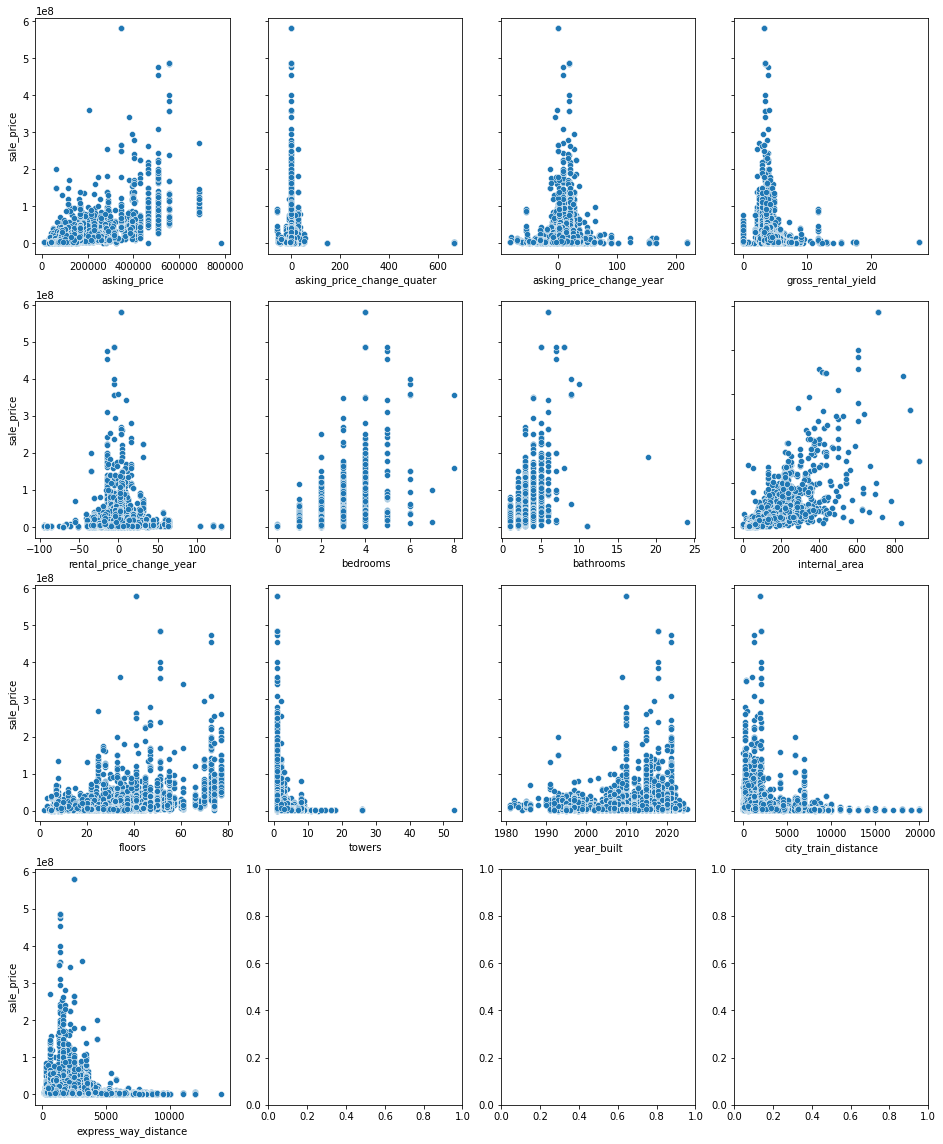

In [543]:
# Plot numeric features against saleprice.

fig, axes = plt.subplots(4, 4, figsize=(16,20))

for i, feat in enumerate(numeric_features): ## iterate column name
    x = i // 4
    y = i % 4
    pl = sns.scatterplot(
        ax=axes[x,y],
        x=feat,
        y='sale_price',
        data=df)
    if y != 0:
        pl.set(ylabel=None, yticklabels=[])  ## show label only the leftmost plot 

### 4.4.2 Categorical Features

In [544]:
def category_chart(data, features, target):
    """Create barcharts from iterating all categorical variables from 'x' list of variables 
    against y
    data = pd.DataFrame
    x = list of categorical variable name
    y = target variable"""
    # create subplots by number of x
    rows = math.ceil(len(features) / 4)
    fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))
    
    # iterate column name
    for i, feat in enumerate(features): 
        x = i // 4
        y = i % 4
        if len(features) <= 4:
            axs = axes[y]
        else:
            axs = axes[x, y]
        pl = sns.barplot(
            ax = axs,
            x = feat,
            y = target,
            data = data)
        if y != 0:
            pl.set(ylabel=None, yticklabels=[])  ## show label only the leftmost plot 

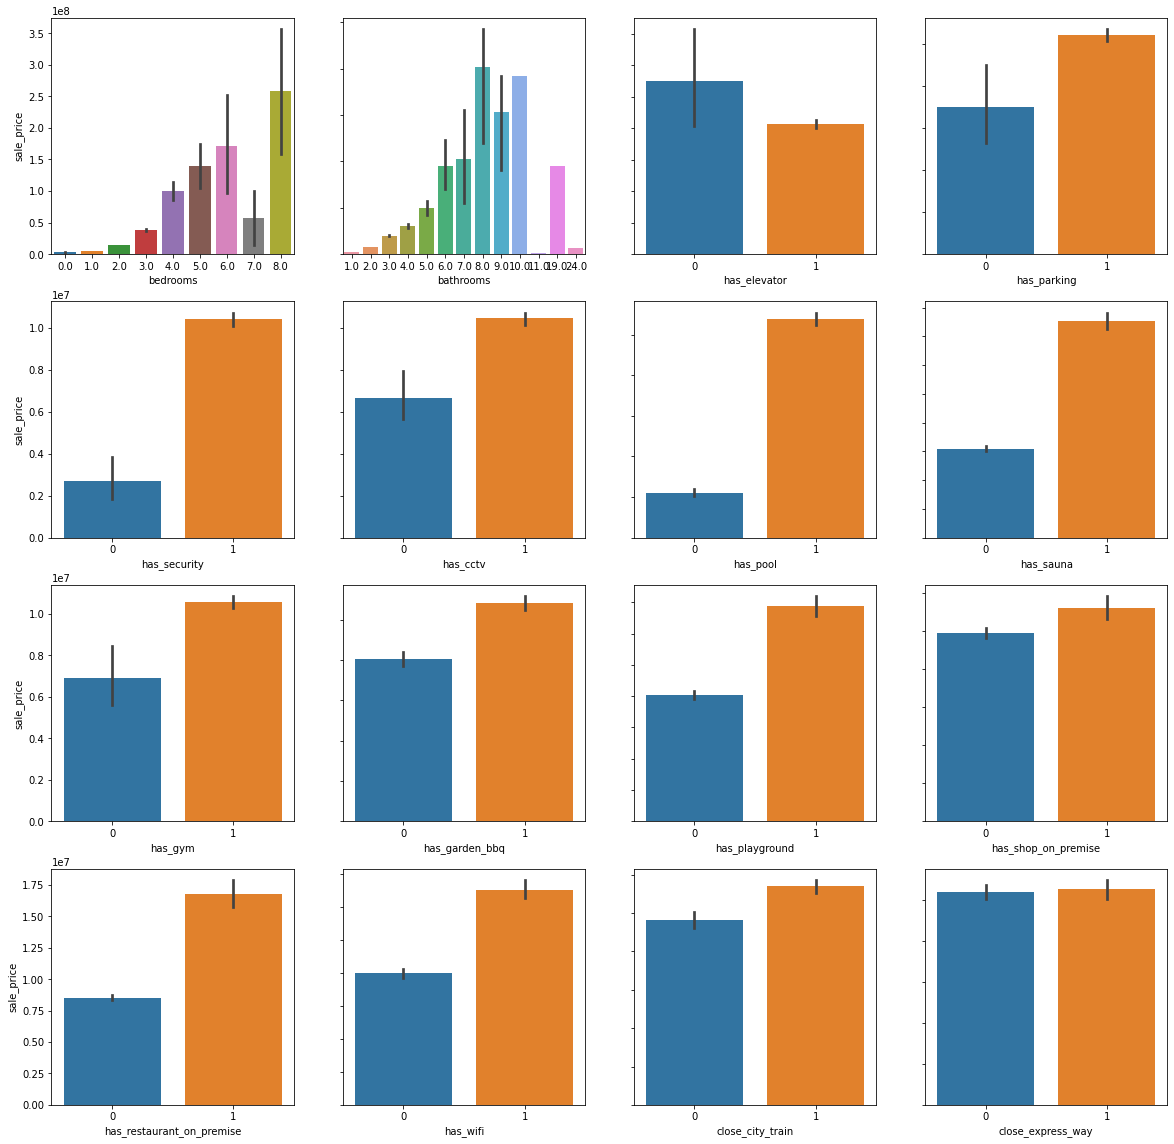

In [545]:
# Plot barchart vs. saleprice
category_chart(df, categorical_features, 'sale_price')

## 4.4 Feature Engineering

## 4.4.2 Data Preparation for Modeling

**This part will create 3 types of dataframe to train models**
1. Dataframe that drop all rows that contain missing values
2. Dataframe that impute missing values by each feature median
3. Dataframe that fill missing values by 0 -> Filling 0 to missing values is good for XGBoost model

Market stats features such as `asking_price`, `rental_price`, `etc.` were decided to remove out from models because they could leave some information leakage to our features.

**To have all values for on hot encoder, all dataset will be feeded to fit one hot encoder.**

In [546]:
# Prepare for one hot encoder
oh = OneHotEncoder()
oh.fit(df[['district']])

OneHotEncoder()

### Dataframe Type 1: 
Drop all rows that contain missing values

---

In [580]:
# Drop null rows
df_dropna = df.dropna().reset_index()

# 'asking_price', 'asking_price_change_quater',
#     'asking_price_change_year', 'gross_rental_yield',
#     'rental_price_change_year', 
    
# Prepare features
features = [
    'bedrooms', 'bathrooms', 'internal_area',
    'floors', 'towers', 'year_built', 'has_elevator', 'has_parking',
    'has_security', 'has_cctv', 'has_pool', 'has_sauna', 'has_gym',
    'has_garden_bbq', 'has_playground', 'has_shop_on_premise',
    'has_restaurant_on_premise', 'has_wifi', 'city_train_distance',
    'express_way_distance', 'close_city_train', 'close_express_way'
]

# Get dummy features by one hot encoder
df_dummy_district = pd.DataFrame(oh.transform(df_dropna[['district']]).toarray(),
                                 columns=oh.get_feature_names_out())

# Create X and y
X = df_dropna[features].merge(df_dummy_district, left_index=True, right_index=True)
y = df_dropna['sale_price']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# y log transformation
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### Dataframe Type 2: 
Impute missing values by its median.

**To avoid data leakage,** data need to be split as train and test sets before imputation.

---

In [548]:
# Check features that contain missing values
missing_values_df(df)

,n_missing,pct_missing
bathrooms,2496,10.89
year_built,2077,9.06
rental_price_change_year,1638,7.15
bedrooms,847,3.70
asking_price_change_year,609,2.66
asking_price,591,2.58
asking_price_change_quater,591,2.58
gross_rental_yield,591,2.58
express_way_distance,559,2.44
city_train_distance,409,1.78


In [581]:
# Prepare dataframe for imputing median
df_median

# Split data before imputation
df_train_median, df_test_median = train_test_split(df, random_state=42)

df_train_median.reset_index(inplace=True)
df_test_median.reset_index(inplace=True)

# Impute interger features
missing_features = missing_values_df(df).index



for feat in missing_features:
    df_train_median[feat].fillna(df_train_median[feat].median(), inplace=True)
    # Impute test data by train values
    df_test_median[feat].fillna(df_train_median[feat].median(), inplace=True)

features = [
    'bedrooms', 'bathrooms', 'internal_area',
    'floors', 'towers', 'year_built', 'has_elevator', 'has_parking',
    'has_security', 'has_cctv', 'has_pool', 'has_sauna', 'has_gym',
    'has_garden_bbq', 'has_playground', 'has_shop_on_premise',
    'has_restaurant_on_premise', 'has_wifi', 'city_train_distance',
    'express_way_distance', 'close_city_train', 'close_express_way'
]

# Get dummy features by one hot encoder
df_dummy_district_train = pd.DataFrame(oh.transform(df_train_median[['district']]).toarray(),
                                 columns=oh.get_feature_names_out())
df_dummy_district_test = pd.DataFrame(oh.transform(df_test_median[['district']]).toarray(),
                                 columns=oh.get_feature_names_out())

# Create train and test sets
X_train_median = df_train_median[features].merge(df_dummy_district_train, left_index=True, right_index=True)
X_test_median = df_test_median[features].merge(df_dummy_district_test, left_index=True, right_index=True)
y_train_median = df_train_median['sale_price']
y_test_median = df_test_median['sale_price']


# y log transformation
y_train_median_log = np.log(y_train_median)
y_test_median_log = np.log(y_test_median)


In [556]:
# Check result train set
missing_values_df(df_train_median)

,n_missing,pct_missing


In [557]:
# Check result test set
missing_values_df(df_test_median)

,n_missing,pct_missing


### Dataframe Type 3: 
Fill null values with zero

---

In [582]:
# Prepare data for filling zero
df_zero = df.copy()

# Fil missing values with zero
df_zero.fillna(value=0, inplace=True)

# Create X, y
features = [
    'bedrooms', 'bathrooms', 'internal_area',
    'floors', 'towers', 'year_built', 'has_elevator', 'has_parking',
    'has_security', 'has_cctv', 'has_pool', 'has_sauna', 'has_gym',
    'has_garden_bbq', 'has_playground', 'has_shop_on_premise',
    'has_restaurant_on_premise', 'has_wifi', 'city_train_distance',
    'express_way_distance', 'close_city_train', 'close_express_way'
]

# Get dummy features by one hot encoder
df_dummy_district = pd.DataFrame(oh.transform(df_zero[['district']]).toarray(),
                                 columns=oh.get_feature_names_out())

# Create X and y
X_zero = df_zero[features].merge(df_dummy_district, left_index=True, right_index=True)
y_zero = df_zero['sale_price']

# Train and test split
X_train_zero, X_test_zero, y_train_zero, y_test_zero = train_test_split(X_zero, y_zero, random_state=42)

# y log transformation
y_train_zero_log = np.log(y_train_zero)
y_test_zero_log = np.log(y_test_zero)


# 5. Modeling and Evaluation
---
---

In [559]:
# create function to return model metrics

def r2_adj(y_true, y_pred):
    """Calcualte adjusted R^2"""
    return 1 - (1-metrics.r2_score(y_true, y_pred)) * (len(y) - 1 ) / (len(y) - X.shape[1] - 1)


def reg_metrics(trained_model, X_train, X_test, y_train, y_test, 
                cross_val=True, log_y=False):
    """Return evaluation metrices of regression problems:
    """
    # Predict y
    y_train_preds = trained_model.predict(X_train)
    y_test_preds = trained_model.predict(X_test)
    
    # Compute R^2
    train_r2 = metrics.r2_score(y_train, y_train_preds)
    train_adj_r2 = r2_adj(y_train, y_train_preds)
    test_r2 = metrics.r2_score(y_test, y_test_preds)
    test_adj_r2 = r2_adj(y_test, y_test_preds)
    
    
    # Turn of cross validation scores if cross_val == Fasle
    if cross_val == True:
        cross_train = cross_val_score(trained_model, X_train, y_train)
        cross_train_mean = cross_val_score(trained_model, X_train, y_train).mean()
    else:
        cross_train = None
        cross_train_mean = None
    
    
    # If log is True -> Turn y to exp(y) to return MSE as the same units
    if log_y == True:
        y_train = np.exp(y_train)
        y_test = np.exp(y_test)
        y_train_preds = np.exp(y_train_preds)
        y_test_preds = np.exp(y_test_preds)
    else:
        pass
    
    # Compute MSE
    train_mae = metrics.mean_absolute_error(y_train, y_train_preds)
    train_rmse = metrics.mean_squared_error(y_train, y_train_preds, squared=False)
    test_mae = metrics.mean_absolute_error(y_test, y_test_preds)
    test_rmse = metrics.mean_squared_error(y_test, y_test_preds, squared=False)

        
    print(f"""-----------Train Data-----------
MAE: {train_mae}
MSE: {train_rmse**2}
RMSE: {train_rmse}
R2: {train_r2}
Adj_R2: {train_adj_r2}
Cross Validation: {cross_train}
Cross Validation Mean: {cross_train_mean}
--------------------------------""")
    print(f"""-----------Test Data-----------
MAE: {test_mae}
MSE: {test_rmse**2}
RMSE: {test_rmse}
R2: {test_r2}
Adj_R2: {test_adj_r2}
--------------------------------""")

In [560]:
def plot_ytrue_ypred(y_true, y_pred):
    """Make a scatter plot of y_true vs y_pred"""
    plt.figure(figsize=(10,6))
    plt.scatter(y_true, y_pred)
    min_val = min(min(y_true), min(y_pred)) * 0.9
    max_val = max(max(y_true), max(y_pred)) * 1.1
    plt.axline([min_val, min_val], [max_val, max_val], color='orange')
    plt.xlim(min_val,max_val)
    plt.ylim(min_val,max_val);
    plt.title('True Values vs. Prediction', fontsize=15)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predictions', fontsize=12)
    
    

## 5.1 Linear Regression Models
To squeeze performance of linear regression based models, feature selection and feature engineering will paly important role of this section.

### Base Model
---

In [579]:
# Regression with drop n/a
lr = LinearRegression()
lr.fit(X_train, y_train)
reg_metrics(lr, X_train, X_test, y_train, y_test)

-----------Train Data-----------
MAE: 5664118.578465519
MSE: 160907888143031.66
RMSE: 12684947.30548896
R2: 0.6681362946145513
Adj_R2: 0.6667513547529572
Cross Validation: [0.66051874 0.61600802 0.69868928 0.69420511 0.65978057]
Cross Validation Mean: 0.6658403425478211
--------------------------------
-----------Test Data-----------
MAE: 5671281.648425381
MSE: 147742961397344.6
RMSE: 12154956.248269452
R2: 0.7108521986900165
Adj_R2: 0.7096455216433013
--------------------------------


In [562]:
# Regression with median imputation
lr = LinearRegression()
lr.fit(X_train_median, y_train_median)
reg_metrics(lr, X_train_median, X_test_median, y_train_median, y_test_median)

-----------Train Data-----------
MAE: 5684258.020160479
MSE: 208397158156791.3
RMSE: 14435967.517170137
R2: 0.60461320707518
Adj_R2: 0.6029631714690464
Cross Validation: [0.65402307 0.55647516 0.63336031 0.60517503 0.55489648]
Cross Validation Mean: 0.6007860132016125
--------------------------------
-----------Test Data-----------
MAE: 5619972.162636525
MSE: 225624372156550.47
RMSE: 15020797.98667669
R2: 0.5608417755794026
Adj_R2: 0.5590090722114929
--------------------------------


In [171]:
pd.Series(lr.coef_, index=X_train.columns).sort_values(ascending=False)[:10]

has_parking              8112635.30
district_Bang Bon        5079483.49
district_Lak Si          4915447.99
district_Phasi Charoen   4024911.47
district_Taling Chan     3950899.13
district_Bueng Kum       3917913.21
bathrooms                3129558.53
district_Bang Sue        2934340.41
district_Prawet          2773144.61
district_Rat Burana      2723788.16
dtype: float64

### Linear Regression with Log Transformation
---

Using log `sale_price`

In [563]:
lr_log_y = LinearRegression()
lr_log_y.fit(X_train, y_train_log)

LinearRegression()

In [564]:
reg_metrics(lr_log_y, X_train, X_test, y_train_log, y_test_log, log_y=True)

-----------Train Data-----------
MAE: 5399321.2291035885
MSE: 3344584147689284.5
RMSE: 57832379.75121968
R2: 0.8775764904054434
Adj_R2: 0.8770655903109699
Cross Validation: [0.87330378 0.87394899 0.87899909 0.87960668 0.87374623]
Cross Validation Mean: 0.8759209543216372
--------------------------------
-----------Test Data-----------
MAE: 5835837.382524506
MSE: 2774698775126900.0
RMSE: 52675409.58670279
R2: 0.8795004964583967
Adj_R2: 0.8789976256621966
--------------------------------


In [565]:
test_y_preds = lr_log_y.predict(X_train)
metrics.mean_squared_error(np.exp(y_train_log), np.exp(test_y_preds), squared=False)

57832379.75121968

From log transformation of `sale_price`, a model performance is better comparing by R-squared.

---

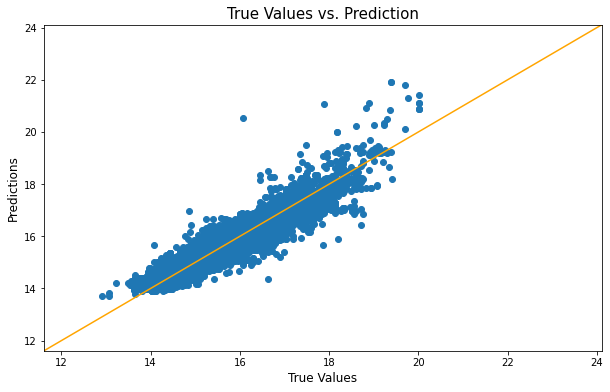

In [566]:
plot_ytrue_ypred(y_train_log, test_y_preds)

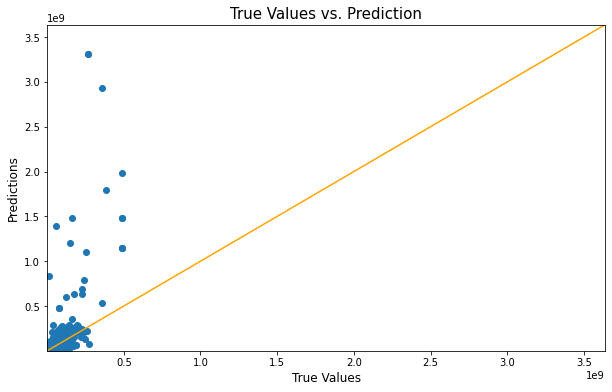

In [567]:
plot_ytrue_ypred(np.exp(y_train_log), np.exp(test_y_preds))

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


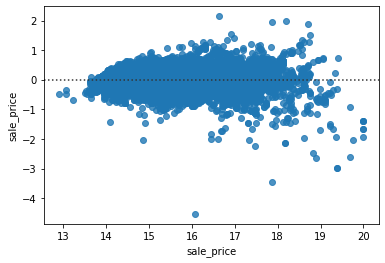

In [568]:
res = y_train_log - test_y_preds
sns.residplot(y_train_log, res);

## 5.2 Random Forest Models

### Normal Random Forest
---

In [569]:
%%time
rfr = RandomForestRegressor(random_state=42)

rfr.fit(X_train, y_train)

CPU times: total: 5.53 s
Wall time: 5.53 s


RandomForestRegressor(random_state=42)

In [570]:
reg_metrics(rfr, X_train, X_test, y_train, y_test, cross_val=False)

-----------Train Data-----------
MAE: 755633.3044401448
MSE: 7071213291385.506
RMSE: 2659175.3028684487
R2: 0.9854160099201348
Adj_R2: 0.9853551477382362
Cross Validation: None
Cross Validation Mean: None
--------------------------------
-----------Test Data-----------
MAE: 1503870.4950415294
MSE: 30047382843574.254
RMSE: 5481549.31051197
R2: 0.9411942565509251
Adj_R2: 0.9409488473155323
--------------------------------


### Random Forest with Log Transformation
---
Using log `sale_price`

In [571]:
# Try log transformation
rfr_log = RandomForestRegressor(random_state=42)

rfr_log.fit(X_train, y_train_log)

RandomForestRegressor(random_state=42)

In [573]:
reg_metrics(rfr_log, X_train, X_test, y_train_log, y_test_log, log_y=True)

-----------Train Data-----------
MAE: 720174.9881915714
MSE: 7612962638855.341
RMSE: 2759159.7704473985
R2: 0.9908477835330495
Adj_R2: 0.9908095893310283
Cross Validation: [0.96242714 0.96390492 0.96208007 0.96786857 0.96312574]
Cross Validation Mean: 0.963881287622353
--------------------------------
-----------Test Data-----------
MAE: 1479352.141284887
MSE: 28899710554953.676
RMSE: 5375845.101465785
R2: 0.9709850550408771
Adj_R2: 0.9708639693264596
--------------------------------


**Note:** Even R-squared is high but converted RMSE is higher than normal model with lower R-squared

### Random Forest with GridSearch
---

In [204]:
%%time
# Set hyperparametesr
hyper_params = {'max_depth': [5, 10, 15],
                'min_samples_leaf': [3, 4, 5],
                'n_estimators': [100, 200]
               }

# Instantiate GridSearchCV
rfr_gridsearch = GridSearchCV(RandomForestRegressor(),
                              hyper_params,
                              cv=5,
                              verbose=1
                             )

# Fit train data
rfr_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [205]:
rfr_gridsearch.best_params_

{'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 100}

In [206]:
reg_metrics(rfr_gridsearch, cross_val=False)

-----------Train Data-----------
MAE: 1008814.8065281063
MSE: 9548854491974.355
RMSE: 3090122.083668274
R2: 0.9819553393863594
Adj_R2: 0.9818713566468572
Cross Validation: None
Cross Validation Mean: None
--------------------------------
-----------Test Data-----------
MAE: 1693161.798461926
MSE: 50026097375780.78
RMSE: 7072912.934271196
R2: 0.9243292688965828
Adj_R2: 0.9239770851989083
--------------------------------


## 5.3 XGBoost

### XGBoost - Model 1
---

In [574]:
%%time
xgbr = xgboost.XGBRegressor(objective='reg:squarederror',
                            seed=42)

xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [575]:
reg_metrics(xgbr, X_train, X_test, y_train, y_test)

-----------Train Data-----------
MAE: 995991.2942990644
MSE: 5401721127887.436
RMSE: 2324160.3059787927
R2: 0.988859246059049
Adj_R2: 0.9888127532550133
Cross Validation: [0.914898   0.8890534  0.90030456 0.94893753 0.94467344]
Cross Validation Mean: 0.919573385234812
--------------------------------
-----------Test Data-----------
MAE: 1590772.1424506144
MSE: 25601344415513.99
RMSE: 5059777.111248477
R2: 0.9498955999100575
Adj_R2: 0.9496865032845461
--------------------------------


### XGBoost - Model 2
---

In [576]:
%%time
xgbr_2 = xgboost.XGBRegressor(objective='reg:squarederror',
                            seed=42)

xgbr_2.fit(X_train, 
         y_train,
         eval_set=[(X_test, y_test)],
         verbose=False)

CPU times: total: 6.81 s
Wall time: 995 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [578]:
reg_metrics(xgbr_2, X_train, X_test, y_train, y_test)

-----------Train Data-----------
MAE: 995991.2942990644
MSE: 5401721127887.436
RMSE: 2324160.3059787927
R2: 0.988859246059049
Adj_R2: 0.9888127532550133
Cross Validation: [0.914898   0.8890534  0.90030456 0.94893753 0.94467344]
Cross Validation Mean: 0.919573385234812
--------------------------------
-----------Test Data-----------
MAE: 1590772.1424506144
MSE: 25601344415513.99
RMSE: 5059777.111248477
R2: 0.9498955999100575
Adj_R2: 0.9496865032845461
--------------------------------


### XGBoost with GridSearch
---

In [ ]:
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  

In [8]:
%%time
# Set hyperparametesr
hyper_params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_alpha': [0, 1.0, 10.0],
    'reg_lambda': [0, 1.0, 10.0],
    'min_child_weight': [1.5, 6, 10],
    'subsample':[0.6, 0.90]  
}

xgbr_model = xgboost.XGBRegressor(objective='reg:squarederror',
                            seed=42)

# Instantiate GridSearchCV
xgbr_gridsearch = GridSearchCV(xgbr_model,
                              hyper_params,
                              cv=5,
                              verbose=1,
                              scoring='neg_mean_squared_error'
                              )

# Fit train data
xgbr_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
CPU times: total: 1h 41min 48s
Wall time: 16min 10s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5],
                         'min_child_weight': [1.5, 6, 10],
                         'reg_alpha': [0, 1.0, 10.0],
                         'reg_lambda': [0, 1.0, 10.0],
                         'subsample': [0.6, 0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [12]:
xgbr_gridsearch.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1.5,
 'reg_alpha': 0,
 'reg_lambda': 0,
 'subsample': 0.9}

In [11]:
reg_metrics(xgbr_gridsearch, cross_val=False)

-----------Train Data-----------
MAE: 1392102.3978960395
MSE: 4051813084980.057
RMSE: 2012911.5939305574
R2: 0.9888593018350843
Adj_R2: 0.9882168500405151
Cross Validation: None
Cross Validation Mean: None
--------------------------------
-----------Test Data-----------
MAE: 2634339.173267327
MSE: 23593161263846.97
RMSE: 4857279.2038184265
R2: 0.891512435632122
Adj_R2: 0.8852562720250622
--------------------------------


## 5.3 Neural Network Based Models
---

In [363]:
# Scale data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [367]:
%%time
# Insert model here...
model = Sequential()

# Hidden layer
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(32, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation=None))

# Compile model (loss fuction optimzing)
model.compile(optimizer='adam',
              loss='mean_squared_error')

res = model.fit(X_train_sc, y_train,
                epochs=500,
                validation_data=(X_test_sc, y_test),
                verbose=0
         )

In [368]:
reg_metrics(model, X_train=X_train_sc, X_test=X_test_sc, cross_val=False)

110/110 [==============================] - 0s 1ms/step
-----------Train Data-----------
MAE: 1885791.2721873813
MSE: 22597864193059.445
RMSE: 4753721.089111081
R2: 0.9572963657264205
Adj_R2: 0.9570945440391985
Cross Validation: None
Cross Validation Mean: None
--------------------------------
-----------Test Data-----------
MAE: 2127788.258516249
MSE: 32793784910916.35
RMSE: 5726585.798791139
R2: 0.9503952974541117
Adj_R2: 0.9501608606214565
--------------------------------


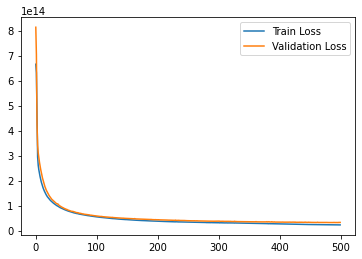

In [369]:
plt.plot(res.history['loss'], label='Train Loss')
plt.plot(res.history['val_loss'], label='Validation Loss')
plt.legend();

In [370]:
res_2 = model.fit(X_train_sc, y_train,
                epochs=100,
                validation_data=(X_test_sc, y_test),
                verbose=0
         )

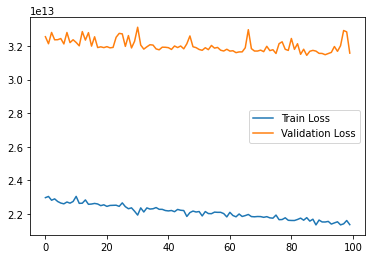

In [372]:
plt.plot(res_2.history['loss'], label='Train Loss')
plt.plot(res_2.history['val_loss'], label='Validation Loss')
plt.legend();

In [373]:
reg_metrics(model, X_train=X_train_sc, X_test=X_test_sc, cross_val=False)

110/110 [==============================] - 0s 950us/step
-----------Train Data-----------
MAE: 1823650.353786583
MSE: 20980477997718.434
RMSE: 4580445.174622051
R2: 0.9603527726494336
Adj_R2: 0.960165395849925
Cross Validation: None
Cross Validation Mean: None
--------------------------------
-----------Test Data-----------
MAE: 2062530.0586872862
MSE: 31571993178796.67
RMSE: 5618896.081864895
R2: 0.9522434103087107
Adj_R2: 0.9520177078440043
--------------------------------


In [374]:
X_train

,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year,bedrooms,bathrooms,internal_area,floors,towers,...,district_Rat Burana,district_Ratchathewi,district_Saphan Sung,district_Sathon,district_Suan Luang,district_Taling Chan,district_Thon Buri,district_Wang Thonglang,district_Watthana,district_Yan Nawa
407,44759.00,0.00,-8.25,6.11,-5.79,2.00,2.00,114.00,19.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4489,100988.00,0.00,2.07,4.09,-8.27,1.00,1.00,35.00,23.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8183,98839.00,0.00,-0.90,4.02,-17.87,2.00,1.00,85.22,21.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11547,193382.00,0.00,-3.50,3.93,7.09,1.00,1.00,51.00,40.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
13040,109803.00,0.00,1.77,4.61,16.25,3.00,2.00,147.00,23.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,108571.00,0.00,0.00,4.26,-1.28,2.00,2.00,57.68,24.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
13418,100703.00,0.00,2.97,3.67,-3.14,2.00,2.00,89.00,47.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
5390,98333.00,5.29,-10.48,5.44,3.72,1.00,1.00,39.72,8.00,4.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
860,54839.00,8.51,75.86,4.95,3.67,1.00,1.00,32.00,14.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## 5.4 Final Model

# 6. Additional Section
---
---

# 7. Summarization
---
---

## 7.2 Future Works

This project's model and dataset do not captured element of design which is one of main factor that could make impact on condominium value. So the next project would capture it by using condominium images to predict condominium price as well.